# Explaining the results

In this section we will compare the results obtained from running the previous experiments with the author claims. We also explain the reasons that led to certain results.

## Experiment 1

In this experiment we trained two **ResNet-18** models on **CIFAR-10** dataset for **350** epochs using **SGD** optimizer. One model was warm-started with a model trained on half the data, and the other was randomly initialized.

### Comparing Results

|          Original Paper           |              Our Results               |
|:---------------------------------:|:--------------------------------------:|
| 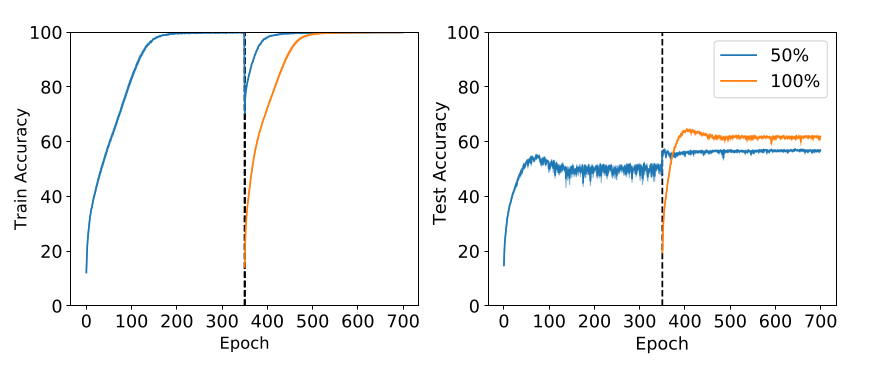 | 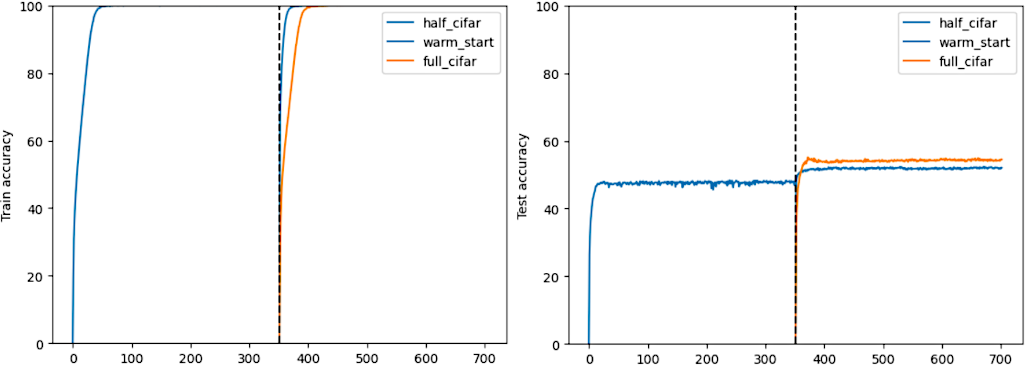 |

The figures show that we replicated the results, as the warm-starting effect is evident in the generalization gap between the test accuracy and the training accuracy. However, our model differs from the original paper in two ways: it trains faster, but it achieves lower test accuracy within a reasonable margin. Our accuracy is more consistent with the results of the second experiment.
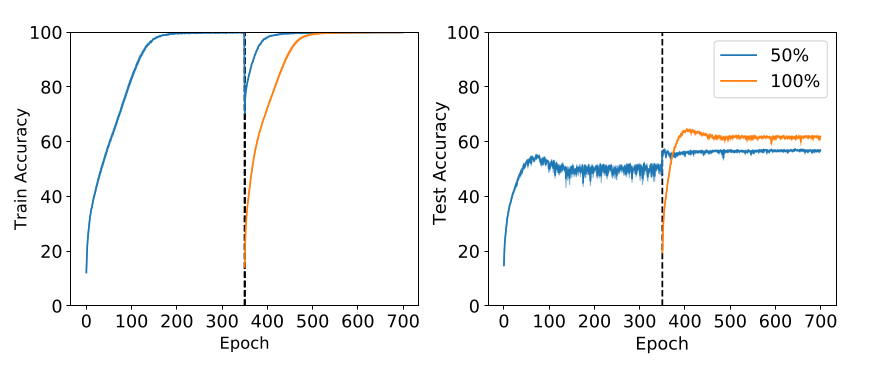
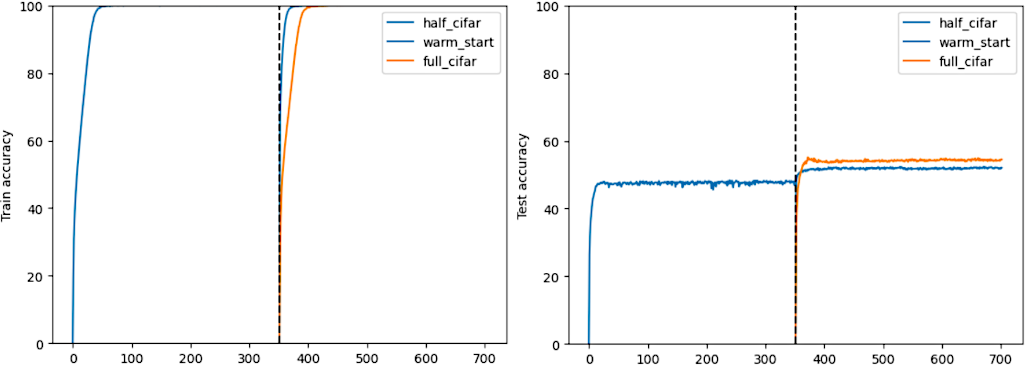

### Difficulty of obtaining the results

This figure was easy to reproduce because the original paper described the experiment in detail. However, the differnce in the training convergence and the final test accuracy may result from using two different training codes, since the authors did not share their code with the paper.

### Understanding the results

The warm-starting and random initialized models have different learning patterns. This is due to the uneven gradients contribution in the warm-starting model. The old data (previously trained on) produce lower losses and thus lower gradients than the new data (never seen before), making it harder for the model to generalize. This is not the case for the random initialized model as all the data is actually new to the model.

## Experiment 2

In this experiment we trained **ResNet18** and **3-layer MLP** models until *99%* train accuracy on **CIFAR-10**,**CIFAR-100**and **SVHN** datasets, using either warm-starting or random initialization for the weights. We used **SGD** or **Adam** optimizers to update the weights based on the gradients, and measured test accuracy of each model on each dataset.

### Comparing Results

|     Source     |                  Table                   |
|:--------------:|:----------------------------------------:|
| Original Paper | 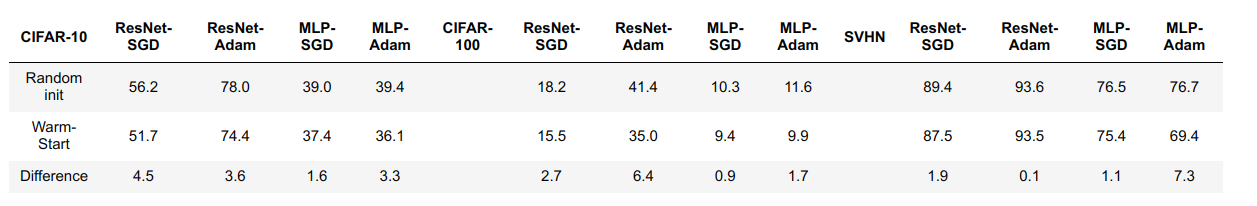 |
|  Our Results   |  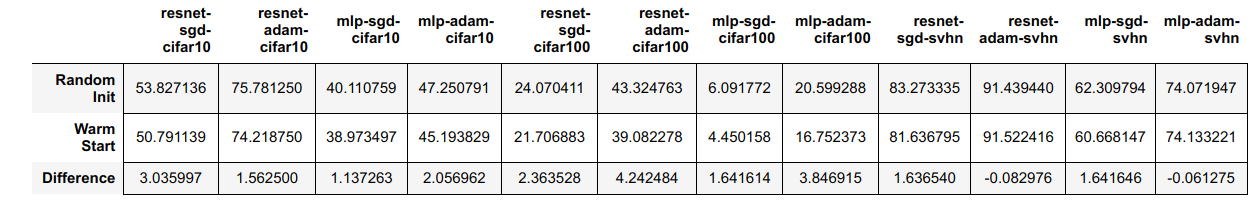  |

The two tables show that:

-   The differences are similar for **CIFAR-10** and **CIFAR-100**, but slightly different for **SVHN**
-   The **MLP** model trained on **CIFAR-10** with **Adam** optimizer achieved almost **9% higher** accuracies
-   The **MLP-SGD** model had **4% lower** accuracies on **CIFAR-100** than the original paper
-   The **MLP-Adam** model had **10% higher** accuracies on **CIFAR-100** than the original paper
-   The **SVHN** results are in the same range, but not exactly the same
-   The other training and test accuracies are close to the original paper, with minor differences.
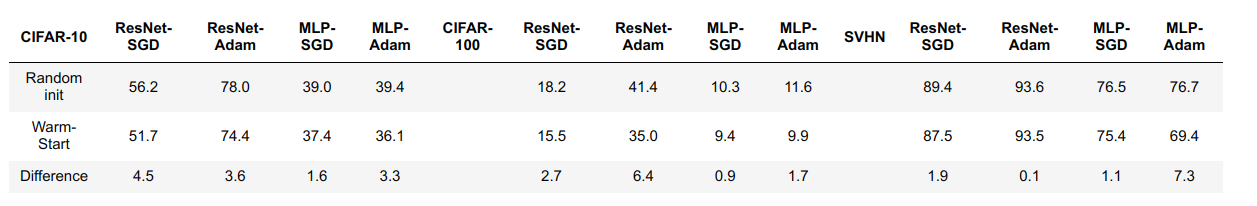
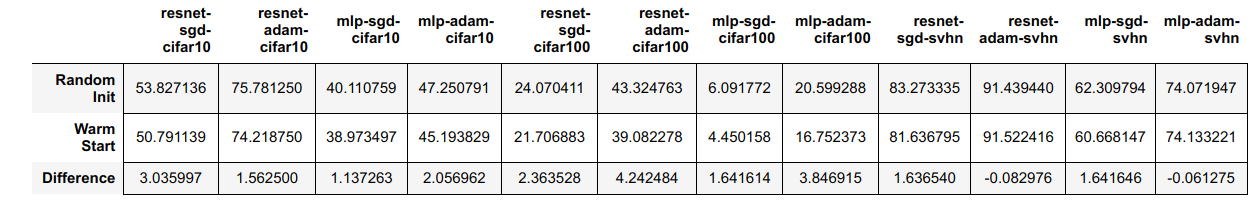

### Difficulty of obtaining the results

We followed the detailed explanation in the paper to conduct the experiments, but the lack of code led to slightly different results. Our results on the SVHN dataset did not show the generalization gap between warm-starting and random initialization as in the original paper, even though we did the same experiment. This may be due to some missing details about this specific experiment that the authors omitted. Providing the code would increase the reproducibility of these results.

### Understanding these results

The gradient distribution imbalance affects the generalization gap for the CIFAR datasets, **but not for the SVHN**. This is because the SVHN dataset is an easy image classification dataset that does not need a large model to achieve high accuracies. Therefore, the imbalance in gradient contributions does not have a significant impact on the model update, as the loss for the new data drops quickly.

## Experiment 3

We train a **ResNet18** model on **CIFAR-10** dataset using online training, which is adding more data gradually. We split the dataset into *1000-sample* chunks, and train the model on each chunk until it reaches *99%* training accuracy. We compare the training time and test accuracy for each chunk between random initialization and warm-starting.

### Comparing Results

|          Original Paper           |              Our Results               |
|:---------------------------------:|:--------------------------------------:|
| 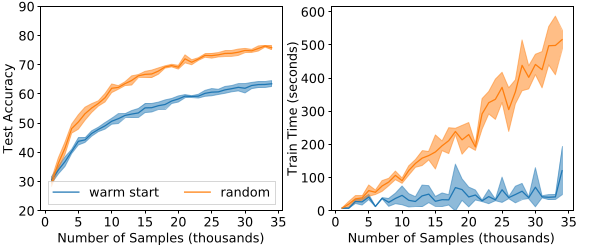 | 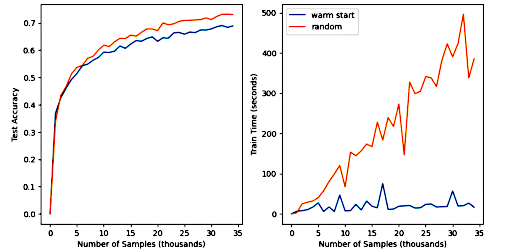 |

The figures show that we obtained the same training time relations and similar accuracies for the different initializations, but the accuracy gap between the random initialization and the warm-starting models was 5%, whereas in the original paper it is more than 10%.
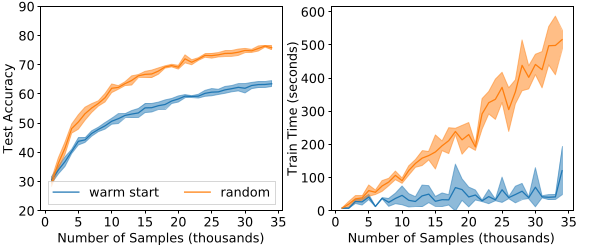
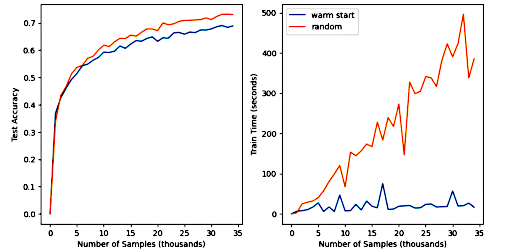

### Difficulty of obtaining the results

We followed the clear description to implement the experiment. We also obtained similar training time relations, as it makes sense that the warm-starting model will converge faster than the random initialized model. However, we did not achieve the same accuracy difference between the two initializations. This was consistent for different experiments, suggesting that there might be some details about the ResNet-18 model architecture that the authors omitted and could be revealed if they shared their code. Nevertheless, the generalization gap effect still exists for the two initializations.

### Understanding these results

The gradient imbalance causes the generalization gap between the two initializations. But we can also see that the training time and random initialization have a linear relation, as the model starts from scratch every time and needs more time to train on the new data. This is different for the warm-start model, as it already knows the old data and needs less time to adapt to the new data, resulting in almost constant training time for each new data split added.

# Conclusion

The generalization gap effect between warm-starting and random initialization holds. Even though it sounds reasonable to train our old model with the new data, our experiments show that this leads to lower accuracy than the randomly initialized model. In the rest of the paper, the authors propose a simple technique called **shrink-perturb** that overcomes the generalization gap by balancing the gradient contribution.